# Create Latitude and Longitude Combinations
Add dependencies and generate latitudes and longitudes.

In [81]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import requests
from scipy.stats import linregress

In [76]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import API key.
from config import weather_api_key

In [77]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [78]:
# Import time module.
import time

In [9]:
# Starting URL for Weather Map API call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c4ab4bc962de3b8e723f4fbf4a08e5b3


In [5]:
# Create a set of random latitude and Longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

636

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop thorugh all the citites in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate the Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | samusu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | durusu
Processing Record 8 of Set 1 | pasni
Processing Record 9 of Set 1 | barabinsk
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | tual
Processing Record 12 of Set 1 | christchurch
Processing Record 13 of Set 1 | rungata
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | ukiah
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | namibe
Processing Reco

Processing Record 36 of Set 4 | venice
Processing Record 37 of Set 4 | asau
Processing Record 38 of Set 4 | tuy hoa
Processing Record 39 of Set 4 | mwingi
Processing Record 40 of Set 4 | aklavik
Processing Record 41 of Set 4 | rantepao
Processing Record 42 of Set 4 | sioux lookout
Processing Record 43 of Set 4 | mkushi
Processing Record 44 of Set 4 | port macquarie
Processing Record 45 of Set 4 | pionerskiy
Processing Record 46 of Set 4 | tarko-sale
Processing Record 47 of Set 4 | babanusah
City not found. Skipping...
Processing Record 48 of Set 4 | bredasdorp
Processing Record 49 of Set 4 | saldanha
Processing Record 50 of Set 4 | ornskoldsvik
Processing Record 1 of Set 5 | maumere
Processing Record 2 of Set 5 | chifeng
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | port alfred
Processing Record 5 of Set 5 | horta
Processing Record 6 of Set 5 | saint-francois
Processing Record 7 of Set 5 | erdenet
Processing Record 8 of Set 5 | pangody
Processing Record 9 of Se

Processing Record 25 of Set 8 | yinchuan
Processing Record 26 of Set 8 | vredendal
Processing Record 27 of Set 8 | dwarka
Processing Record 28 of Set 8 | gusau
Processing Record 29 of Set 8 | berlevag
Processing Record 30 of Set 8 | matara
Processing Record 31 of Set 8 | coquimbo
Processing Record 32 of Set 8 | nome
Processing Record 33 of Set 8 | murwara
Processing Record 34 of Set 8 | gushikawa
Processing Record 35 of Set 8 | coromandel
Processing Record 36 of Set 8 | nanortalik
Processing Record 37 of Set 8 | novyy urengoy
Processing Record 38 of Set 8 | zhigansk
Processing Record 39 of Set 8 | san vicente de canete
Processing Record 40 of Set 8 | luau
Processing Record 41 of Set 8 | port lincoln
Processing Record 42 of Set 8 | hualmay
Processing Record 43 of Set 8 | requena
Processing Record 44 of Set 8 | anadyr
Processing Record 45 of Set 8 | cotija
City not found. Skipping...
Processing Record 46 of Set 8 | labutta
City not found. Skipping...
Processing Record 47 of Set 8 | grand

Processing Record 11 of Set 12 | rundu
Processing Record 12 of Set 12 | linfen
Processing Record 13 of Set 12 | labuan
Processing Record 14 of Set 12 | odlabari
Processing Record 15 of Set 12 | dauphin
Processing Record 16 of Set 12 | monrovia
Processing Record 17 of Set 12 | henties bay
Processing Record 18 of Set 12 | soyo
Processing Record 19 of Set 12 | mineiros
Processing Record 20 of Set 12 | yumen
Processing Record 21 of Set 12 | umm lajj
Processing Record 22 of Set 12 | aquidauana
Processing Record 23 of Set 12 | xuanhua
Processing Record 24 of Set 12 | inirida
Processing Record 25 of Set 12 | ciras
City not found. Skipping...
Processing Record 26 of Set 12 | seymchan
Processing Record 27 of Set 12 | san patricio
Processing Record 28 of Set 12 | ankazoabo
Processing Record 29 of Set 12 | muroto
Processing Record 30 of Set 12 | bonthe
Processing Record 31 of Set 12 | tecoanapa
Processing Record 32 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 33 of Set 

# Create DataFrame of City Weather Data
Convert an array of dicitionaries toa DataFrame and exporting the DataFrame to a comma-separated (CSV) file.

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.29,114.16,91.99,70,79,8.01,HK,2020-09-12 04:36:33
1,Bengkulu,-3.80,102.27,83.80,66,93,5.53,ID,2020-09-12 04:36:39
2,Kapaa,22.08,-159.32,82.40,69,90,14.99,US,2020-09-12 04:36:39
3,Hilo,19.73,-155.09,80.60,65,90,5.82,US,2020-09-12 04:36:40
4,Puerto Ayora,-0.74,-90.35,68.00,90,95,4.00,EC,2020-09-12 04:36:40
5,Durusu,41.31,28.68,75.20,73,75,20.80,TR,2020-09-12 04:36:41
6,Pasni,25.26,63.47,86.41,48,0,9.95,PK,2020-09-12 04:36:41
7,Barabinsk,55.36,78.36,60.69,58,90,7.36,RU,2020-09-12 04:36:41
8,Rikitea,-23.12,-134.97,73.31,89,100,6.53,PF,2020-09-12 04:36:42
9,Tual,-5.67,132.75,79.48,80,62,16.60,ID,2020-09-12 04:36:42


In [17]:
# Reorder columns in DataFrame.
column_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_reorder]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2020-09-12 04:36:33,22.29,114.16,91.99,70,79,8.01
1,Bengkulu,ID,2020-09-12 04:36:39,-3.80,102.27,83.80,66,93,5.53
2,Kapaa,US,2020-09-12 04:36:39,22.08,-159.32,82.40,69,90,14.99
3,Hilo,US,2020-09-12 04:36:40,19.73,-155.09,80.60,65,90,5.82
4,Puerto Ayora,EC,2020-09-12 04:36:40,-0.74,-90.35,68.00,90,95,4.00
5,Durusu,TR,2020-09-12 04:36:41,41.31,28.68,75.20,73,75,20.80
6,Pasni,PK,2020-09-12 04:36:41,25.26,63.47,86.41,48,0,9.95
7,Barabinsk,RU,2020-09-12 04:36:41,55.36,78.36,60.69,58,90,7.36
8,Rikitea,PF,2020-09-12 04:36:42,-23.12,-134.97,73.31,89,100,6.53
9,Tual,ID,2020-09-12 04:36:42,-5.67,132.75,79.48,80,62,16.60


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs Temperature
Use Matplotlib to create visualizations on how weather parameters change based on latitude.

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

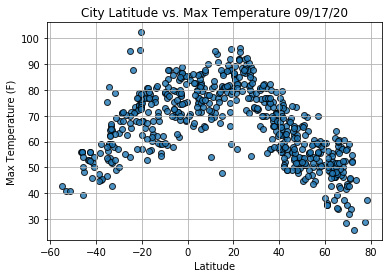

In [22]:
# Build the scatter plot for latitude vs. temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

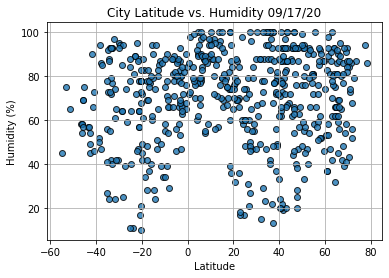

In [27]:
# Build the scatter plot for Latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

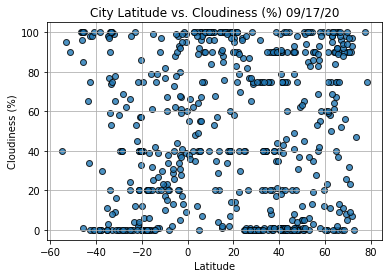

In [25]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

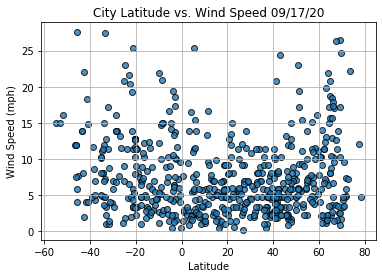

In [26]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# Linear Regression Function

In [88]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [70]:
index13 = city_data_df.loc[13]
index13

City                  Tuktoyaktuk
Country                        CA
Date          2020-09-12 04:36:44
Lat                         69.45
Lng                       -133.04
Max Temp                     35.6
Humidity                       93
Cloudiness                     90
Wind Speed                   26.4
Name: 13, dtype: object

In [73]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Correlation Between Latitude and Maximum Temperature

### Linear Regression on the Maximum Temperature for the Northern Hemisphere

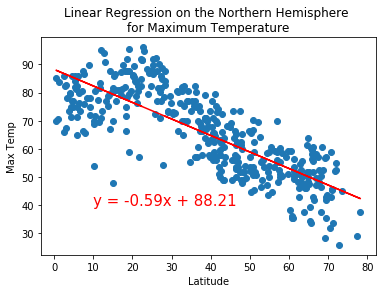

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

### Linear Regression on the Maximum Temperature for the Southern Hemisphere

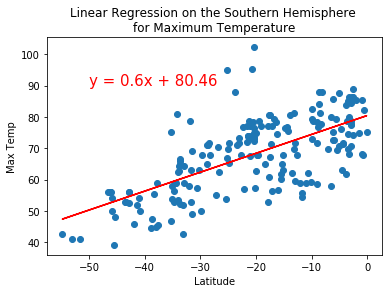

In [91]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp', (-50,90))

## Correlation Between Latitude and Percent Humidity

### Linear Regression on the % Humidity for the Nothern Hemisphere

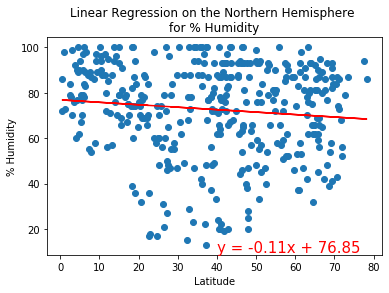

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

### Linear Regression on the % Humidity for the Southern Hemisphere


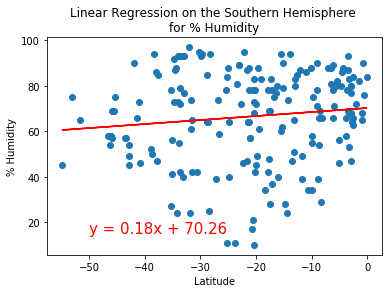

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

## Correlation Between Latitude and Percent Cloudiness

### Linear Regression on the % Cloudiness for the Northern Hemisphere

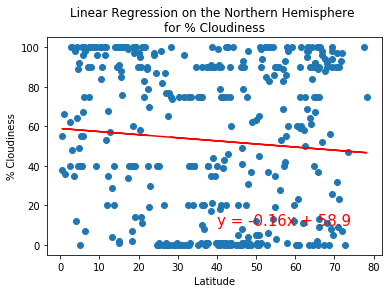

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

### Linear Regression on the % Cloudiness for the Southern Hemisphere

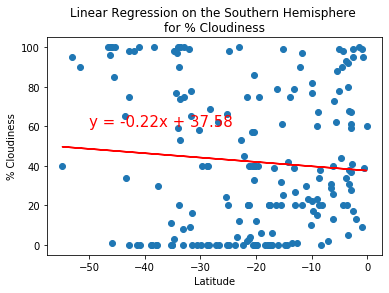

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

## Correlation Between Latitude and Wind Speed

### Linear Regression on the Wind Speed for the Northern Hemisphere

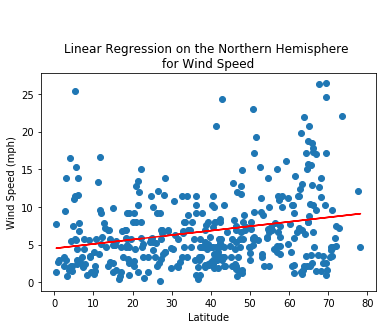

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(40,35))

### Linear Regression on the Wind Speed for the Southern Hemisphere

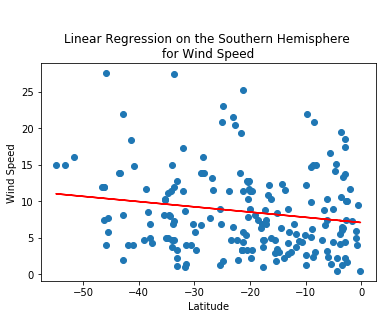

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))